## Lego CV Processing Latency Distribution

The following plot shows the latency distribution of lego requests that results in "Fail to detect board" CV processing.

In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import itertools
import numpy as np

from rmexp import dbutils, config
from rmexp.schema import models

579 frames failed to detect board. Avg processing latency 115.162348877, max 226, min 18


<IPython.core.display.Javascript object>


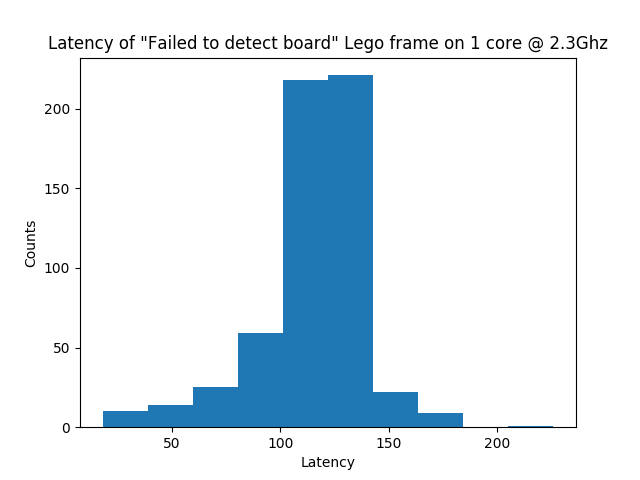

In [6]:
import collections

%matplotlib notebook

trace_name = 'lego_0_905'
exp = 'processlatency-c1-lego_0_905'

sess = dbutils.get_session()
no_board_frame_inds = [item.index for item in sess.query(
    models.SS).filter(models.SS.name==exp).filter(models.SS.val.like('%Failed at stage 1%')).all()]
no_board_frame_latencies = [int(sess.query(
    models.LegoLatency).filter(models.LegoLatency.name==exp).filter(models.LegoLatency.index==idx).one().val) for idx in no_board_frame_inds]
no_board_frame_latencies = np.array(no_board_frame_latencies)
# it seems that there is one outlier (169561), which must be cpu got really occupied
# remove that outlier
no_board_frame_latencies = np.sort(no_board_frame_latencies)[:-1]
print('{} frames failed to detect board. Avg processing latency {}, max {}, min {}'.format(
    np.shape(no_board_frame_latencies)[0],
    np.mean(no_board_frame_latencies), np.max(no_board_frame_latencies), np.min(no_board_frame_latencies)))

plt.figure()
plt.hist(no_board_frame_latencies);
plt.ylabel('Counts')
plt.xlabel('Latency')
plt.title('Latency of "Failed to detect board" Lego frame on 1 core @ 2.3Ghz')

# cnt=collections.Counter(results)
# for (item, freq) in sorted(cnt.items(), key=lambda (k,v): (v,k), reverse=True):
#     print('{}:{}'.format(item, freq))

sess.close()

## Lego # frames with board vs # frames without board

In [5]:
from rmexp import dataset_analysis as analysis

lego_trace_ids = [1, 3, 4, 6]

for trace_id in lego_trace_ids:
    ss = analysis.get_ss_df('lego', trace_id)
    print('==================lego-tr{}============='.format(trace_id))
    no_board_fss = [fss for _, fss in ss.iterrows() if ('Failed at stage 1' in fss['val'] 
                                              or 'Failed at stage 2' in fss['val'] 
                                              or 'Too little black dots, maybe image blurred' in fss['val']
                                              or 'black dots are not inside the board' in fss['val']
                                             )]
    print('# without board {}, # total frames {}'.format(len(no_board_fss), len(ss)))

==================lego-tr1=============
# without board 1849, # total frames 2606
==================lego-tr3=============
# without board 1432, # total frames 2859
==================lego-tr4=============
# without board 1549, # total frames 3111
==================lego-tr6=============
# without board 1652, # total frames 4084
